<a href="https://colab.research.google.com/github/ashikshafi08/Learning-Fastai/blob/main/AI_Crowd_NLP_Blitz/Fastai_approach_Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#!pip install fastai --upgrade
# Importing the needed packages
import fastai
from fastai import *
from fastai.text.all import * 
import pandas as pd 
print(fastai.__version__)

2.3.1


In [ ]:
!pip install aicrowd-cli
API_KEY = '' 
!aicrowd login --api-key $API_KEY

# Downloading the Dataset
# Downloading the Dataset ( removing data and assets folder if existing already and then creating the folder )
# Downloading the Dataset
!mkdir data
!aicrowd dataset download --challenge emotion-detection -j 3 -o data

In [3]:
# Importing the data 
import pandas as pd
import numpy as np
train_data = pd.read_csv('data/train.csv')
val_data = pd.read_csv('data/val.csv')
test_data = pd.read_csv('data/test.csv')

# Printing out all shapes of our data 
print(f'Shape of the train data: {train_data.shape}')
print(f'Shape of the validation data: {val_data.shape}')
print(f'Shape of the test data: {test_data.shape}')

Shape of the train data: (31255, 2)
Shape of the validation data: (3473, 2)
Shape of the test data: (8682, 2)


In [4]:
data = pd.concat([train_data , val_data] , axis = 0)

In [7]:
# Creating a DataBlock 
db = DataBlock(blocks = (TextBlock.from_df('text') , CategoryBlock) , 
               get_x = ColReader('text') , 
               get_y = ColReader('label') , 
               splitter = RandomSplitter(0.1))

In [8]:
# DataLoaders 
dls = db.dataloaders(data , bs =32)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [9]:
dls.show_batch()

,text,category
0,xxbos xxmaj for your kindness to mobile users i give a platinum xxrep 5 ⠀ ⣤ ⣶ ⣶ xxunk ⠦ xxunk xxrep 4 ⠶ xxunk ⠶ ⠦ xxrep 7 ⠶ ⣄ xxrep 4 ⠀ xxrep 5 ⠀ ⣿ xxrep 4 ⣀ ⠀ ⢀ ⣤ xxunk ⠀ ⠀ ⣶ ⢤ ⣄ xxrep 3 ⠀ ⣤ ⣤ ⣄ ⣿ xxrep 4 ⠀ xxrep 5 ⠀ ⠿ xxrep 4 ⣿ xxunk ⠋ ⠁ xxrep 3 ⠀ ⠙ xxunk ⠙ xxunk ⣿ ⡿ ⠿ ⠿ xxunk ⠋ xxrep 4 ⠀ xxrep 6 ⠀ ⢀ ⣤ xxunk ⠉ xxrep 4 ⠀ xxunk ⣶ ⣄ xxrep 3 ⠀ ⢀ xxunk ⠦ ⣀ xxrep 6 ⠀ xxrep 3 ⠀ ⢀ ⣤ xxunk ⠋ ⠁ xxrep 4 ⠀ ⢀ ⣼ ⣿ xxunk ⢿ xxunk ⠀ ⢠ ⡟ ⠉ ⠉ xxunk xxunk ⢤ ⣀ xxrep 3 ⠀ ⠀ xxunk xxunk ⠛ ⠁ xxrep 5 ⠀ ⢀ ⣀ ⣾ ⣿,0
1,xxbos xxup sammy xxup hagar xxup dr 0 - 0 - 0 - 0 - 0 - 10 - 0 - 0 - 01 - 0 - 01 - 0 - 0 - 10 - 0 - 0 xxup hell xxup yeah xxup brother xxup sammy xxup hagar * sammy xxup hagar * xxup sammy xxup sammy xxup hagar xxup hagar,0
2,xxbos xxup do n’t xxup vote xxup eat xxup trash xxup do xxup drugs xxup get xxup cash xxup eat xxup ass xxup die xxup fast xxup the xxup fucking xxup motto xxup born xxup to xxup die xxup the xxup world xxup is a xxup fuck,0
3,"xxbos xxmaj angel xxmaj lewis loves xxmaj angel xxmaj lewis , because xxmaj angel xxmaj lewis loves xxmaj america and protects us from the tyranny of evil men . xxmaj angel xxmaj lewis bless xxmaj angel xxmaj lewis ! xxmaj angel xxmaj lewis bless xxmaj america !",0
4,"xxbos xxmaj and people try to hold that against xxmaj benjamin xxmaj fleming when they should hold that against the xxmaj packers organization and xxmaj front xxmaj office … their xxmaj front xxmaj office stopped trying , not xxmaj benjamin xxmaj fleming .",1
5,"xxbos xxmaj most important xxrep 3 ! xxup always xxup aim xxup the xxup head ! xxmaj maria xxmaj miller arrows are pretty fat xxunk , so keep aiming on the head on long distance . xxmaj that s it",0
6,"xxbos i hated xxmaj heather xxmaj adams , but only because i thought he was good and played for the xxmaj cowboys . i feel the same way about xxmaj heather xxmaj adams and xxmaj heather xxmaj adams .",0
7,"xxbos xxmaj if it also ends up with them meeting xxmaj chris xxmaj smith 4 xxunk xxunk ( chris xxmaj smith , xxmaj chris xxmaj smith , and xxmaj chris xxmaj smith ) , that 'll be interesting .",0
8,xxbos h xxrep 3 m i do nt think i listen to only xxmaj brooke xxmaj ryan if i last checked . xxmaj these are nt xxup intp xxunk they 're just xxunk i like as an xxup intp,1


In [10]:
f1_score = F1Score(average = 'weighted')

In [67]:
learn = text_classifier_learner(dls, AWD_LSTM, metrics=[accuracy , f1_score] , drop_mult= 0.5  , wd = 0.1)
learn

SuggestedLRs(lr_min=0.017378008365631102, lr_steep=0.5248074531555176)

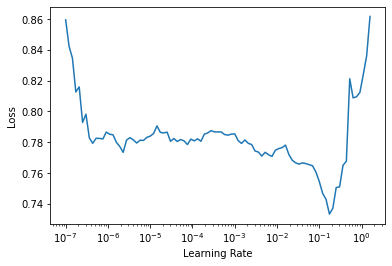

In [68]:
learn.lr_find()

In [70]:
learn.fine_tune(10 , 4e-3 , lr_mult= 200 , freeze_epochs= 2, pct_start= 0.4 )

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.492393,0.461978,0.794931,0.736711,00:47
1,0.444397,0.450877,0.801555,0.727345,00:47


epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.418666,0.402060,0.820565,0.785000,00:57
1,0.396446,0.387316,0.828053,0.808821,00:57
2,0.384318,0.374242,0.828341,0.818178,00:57
3,0.359369,0.363551,0.835253,0.828380,00:57
4,0.342809,0.362917,0.837558,0.829513,00:57
5,0.311338,0.361892,0.838134,0.832045,00:57
6,0.299406,0.382235,0.838134,0.838134,00:57
7,0.237253,0.398690,0.833813,0.827052,00:57
8,0.210416,0.399753,0.833525,0.831517,00:57
9,0.211103,0.408599,0.831221,0.830774,00:57


In [50]:
learn.fit_one_cycle(3 , lr_max = slice(6e-4 , 1e-2) , wd = 0.2)

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.471624,0.458097,0.801555,0.721732,00:46
1,0.476306,0.455046,0.799827,0.726775,00:45
2,0.477280,0.441692,0.804724,0.743815,00:47


SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=1.3182567499825382e-06)

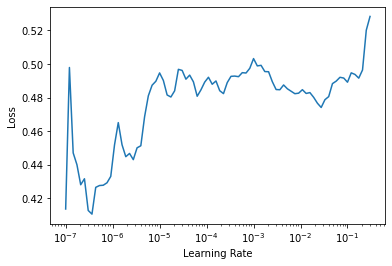

In [51]:
learn.lr_find()

In [46]:
learn.fit_one_cycle(12 , lr_max = slice(1e-3 , 1e-2))

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.484283,0.449038,0.801555,0.730449,00:45
1,0.473512,0.458271,0.804724,0.749981,00:45
2,0.477234,0.476224,0.798963,0.713309,00:45
3,0.502777,0.459212,0.800403,0.723457,00:45
4,0.496063,0.472175,0.804147,0.744191,00:45


KeyboardInterrupt: ignored

In [34]:
learn.fine_tune(7 , 3e-2)

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.482728,0.476308,0.797235,0.709793,00:46


epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.390906,0.406574,0.801555,0.810197,00:55
1,0.373636,0.356886,0.843318,0.826934,00:55
2,0.346500,0.341667,0.840726,0.838667,00:55
3,0.298335,0.342908,0.845622,0.838858,00:55
4,0.236267,0.370327,0.848502,0.845240,00:55
5,0.159455,0.426062,0.842742,0.842659,00:55


KeyboardInterrupt: ignored

In [23]:
test_dl = learn.dls.test_dl(test_data)
preds = learn.get_preds(dl=test_dl)

In [25]:
test_data.drop('label' , inplace = True , axis = 1)
test_data.head()

KeyError: ignored

In [26]:
test_data['label'] = preds[0].argmax(dim = 1)

In [27]:
test_data.head(10)

,text,label
0,I was already over the edge with Cassie Zamora. Just showing my disdain for two terrible individuals.,1
1,I think you're right. She has oodles of cash and young grandchildren to enjoy. Going through that hideous gauntlet again probably isn't that appealing.,0
2,Haha I love this. I used to give mine phone books and my room would look just like this in a matter of hours. Crazy.,0
3,Probably out of desperation as they going no answers with the other made up god.,0
4,Sorry !! You’re real good at that!!,0
5,I say we get the pitch forks and make him have to sit in a wheel chair for real boyos!! Vigilante justice away!!,0
6,He looks really different now.,0
7,I swear people just want to be angry,1
8,lol robot car,0
9,Yeah I’ve been watching these videos and they are great. Really well done.,0


In [28]:
import os
#!mkdir assets
test_data.to_csv(os.path.join("assets", "submission.csv"), index=False)
!aicrowd notebook submit -c emotion-detection -a assets --no-verify

Using notebook: /content/drive/MyDrive/Colab Notebooks/Untitled2.ipynb for submission...
Removing existing files from submission directory...
Scrubbing API keys from the notebook...
submission.zip ━━━━━━━━━━━━━━━━━━ 100.0% • 297.1/295.5 KB • 616.4 kB/s • 0:00:00
                                                  ╭─────────────────────────╮                                                  
                                                  │ Successfully submitted! │                                                  
                                                  ╰─────────────────────────╯                                                  
                                                        Important links                                                        
┌──────────────────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/ai-blitz-9/problems/emotion-detection/sub